## Stage 1 Goal and observing the Provided data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


### The goal of this project is to estimate the taxi fare before each ride begins, enabling price transparency and informed decision-making for riders.

### Target Variable

Fare Amount — the value we want to predict.

### Input Features

Potential inputs include:

Trip distance

Trip duration

Passenger count

Other ride-level attributes available before the ride starts

These features are selected because they are known at the time of prediction.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [5]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### 🔍 Initial Data Inspection

We examined the dataset structure using:

column information

Missing value checks

Duplicate record checks

Descriptive statistics

Findings:

No missing values were detected

No duplicate records were found

Some variables had incorrect data types, which were addressed during the EDA phase

📊 Descriptive Analysis & Data Quality Issues

The descriptive statistics revealed the presence of potential outliers and data quality anomalies.

Key issues identified:

Trips with zero distance but high fare amounts

Records with negative fare amounts, which are not logically valid

🧠 Decision Rationale

These anomalies likely represent data entry errors or system issues, not real-world taxi rides.
They were flagged for further investigation and treatment during EDA to prevent distortion of the fare prediction model.

## Stage 2 EDA 

In [7]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df['fare_amount'].sort_values(ascending=False).head(10)

8476     999.99
20312    450.00
13861    200.01
15474    200.00
12511    175.00
3582     152.00
9280     150.00
16379    140.00
10291    131.00
1928     120.00
Name: fare_amount, dtype: float64

In [9]:
df['fare_amount'].sort_values(ascending=False).tail(10)

18565     -3.0
4423      -3.0
8204      -3.5
20317     -3.5
5448      -3.5
14714     -4.0
17602     -4.0
11204     -4.5
20698     -4.5
12944   -120.0
Name: fare_amount, dtype: float64

In [10]:
df=df.drop(columns=['Unnamed: 0'])

In [11]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [12]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

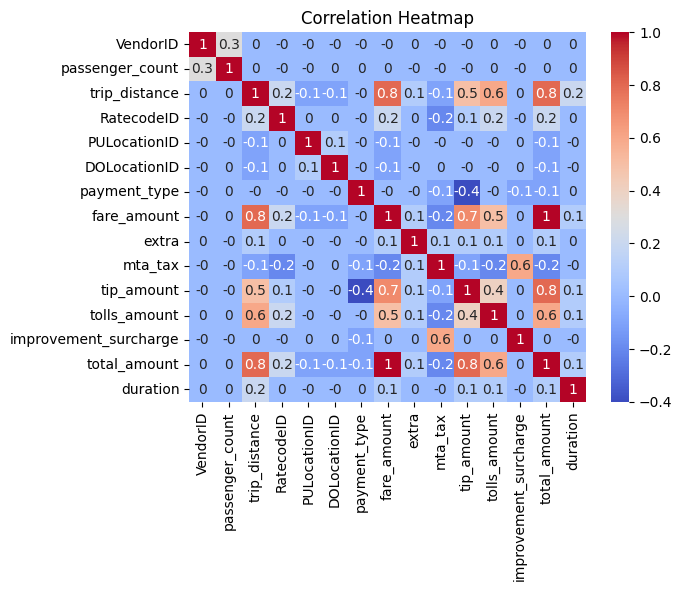

In [13]:
num_cols = df.select_dtypes(include='number')

corr_matrix = num_cols.corr(method='pearson').round(1)
plt.Figure(figsize=(10,20))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
cols_to_drop = [
    'VendorID',
    'RatecodeID',
    'PULocationID',
    'DOLocationID',
    'payment_type',
    'total_amount',
    'tip_amount',
    'mta_tax',
    'extra',
    'improvement_surcharge',
    'store_and_fwd_flag'
]

df1= df.drop(columns=cols_to_drop)

These columns were removed because they showed little to no meaningful relationship with the target variable (fare amount) and therefore did not contribute useful predictive signal. Retaining them would introduce unnecessary noise and reduce model interpretability.

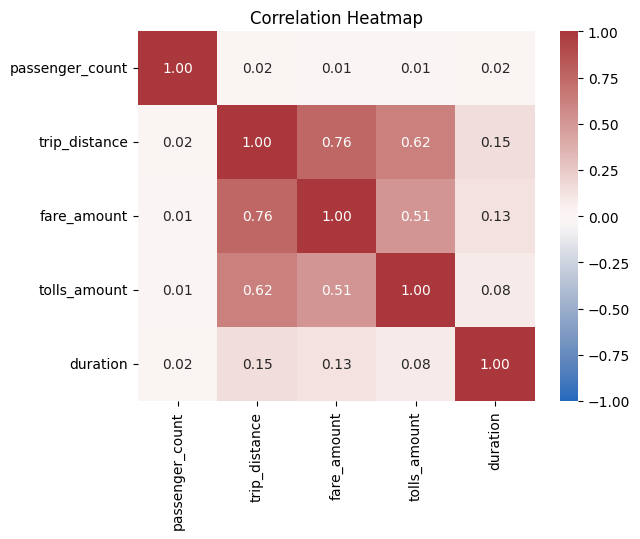

In [15]:
num_cols = df1.select_dtypes(include='number')

corr_matrix = num_cols.corr(method='pearson')
plt.Figure(figsize=(8,6))

sns.heatmap(corr_matrix,annot=True,vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df1.sort_values(by=['fare_amount'],ascending=False)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tolls_amount,duration
8476,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,999.99,0.00,0 days 00:00:58
20312,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,450.00,0.00,0 days 00:00:09
13861,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,200.01,5.76,0 days 01:00:09
15474,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,200.00,0.00,0 days 00:00:05
12511,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,175.00,11.75,0 days 00:00:18
...,...,...,...,...,...,...,...
14714,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,-4.00,0.00,0 days 00:03:10
17602,2017-03-24 19:31:13,2017-03-24 19:34:49,1,0.46,-4.00,0.00,0 days 00:03:36
11204,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,-4.50,0.00,0 days 00:02:51
20698,2017-02-24 00:38:17,2017-02-24 00:42:05,1,0.70,-4.50,0.00,0 days 00:03:48


In [17]:
df1['duration_minutes'] = df1['duration'].dt.total_seconds() / 60

In [18]:
df1['pickup_weekday'] = df1['tpep_pickup_datetime'].dt.dayofweek


In [19]:
df1['pickup_month']=df1['tpep_pickup_datetime'].dt.month

In [20]:
df1.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tolls_amount,duration,duration_minutes,pickup_weekday,pickup_month
0,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,13.0,0.0,0 days 00:14:04,14.066667,5,3
1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,16.0,0.0,0 days 00:26:30,26.500000,1,4
2,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,6.5,0.0,0 days 00:07:12,7.200000,4,12
3,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,20.5,0.0,0 days 00:30:15,30.250000,6,5
4,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,16.5,0.0,0 days 00:16:43,16.716667,5,4
5,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,9.0,0.0,0 days 00:08:00,8.000000,5,3
6,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,47.5,0.0,0 days 00:59:38,59.633333,2,5
7,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,16.0,0.0,0 days 00:21:59,21.983333,1,8
8,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,9.0,0.0,0 days 00:12:07,12.116667,5,2
9,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,13.0,0.0,0 days 00:20:26,20.433333,4,11


In [21]:
cols_to_drop1=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'duration'
]
df1=df1.drop(columns=cols_to_drop1)

In [22]:
df1.head(10)

,passenger_count,trip_distance,fare_amount,tolls_amount,duration_minutes,pickup_weekday,pickup_month
0,6,3.34,13.0,0.0,14.066667,5,3
1,1,1.80,16.0,0.0,26.500000,1,4
2,1,1.00,6.5,0.0,7.200000,4,12
3,1,3.70,20.5,0.0,30.250000,6,5
4,1,4.37,16.5,0.0,16.716667,5,4
5,6,2.30,9.0,0.0,8.000000,5,3
6,1,12.83,47.5,0.0,59.633333,2,5
7,1,2.98,16.0,0.0,21.983333,1,8
8,1,1.20,9.0,0.0,12.116667,5,2
9,1,1.60,13.0,0.0,20.433333,4,11


In [23]:
df1.sort_values(by=['fare_amount'],ascending=False)

,passenger_count,trip_distance,fare_amount,tolls_amount,duration_minutes,pickup_weekday,pickup_month
8476,1,2.60,999.99,0.00,0.966667,0,2
20312,2,0.00,450.00,0.00,0.150000,1,12
13861,1,33.92,200.01,5.76,60.150000,4,5
15474,1,0.00,200.00,0.00,0.083333,1,6
12511,1,0.00,175.00,11.75,0.300000,6,12
...,...,...,...,...,...,...,...
14714,5,0.40,-4.00,0.00,3.166667,6,12
17602,1,0.46,-4.00,0.00,3.600000,4,3
11204,1,0.64,-4.50,0.00,2.850000,6,7
20698,1,0.70,-4.50,0.00,3.800000,4,2


In [24]:
removed = (df1['fare_amount'] <= 0).sum()
print(f"Rows with non-positive fare removed: {removed}")

Rows with non-positive fare removed: 20


In [25]:
df1 = df1.loc[df1['fare_amount'] > 0]

In [26]:
removed = (df1['trip_distance'] <= 0).sum()
print(f"Rows with non-positive distance removed: {removed}")

Rows with non-positive distance removed: 144


In [27]:
df1=df1.loc[df1['trip_distance']>0]

In [28]:
df1.sort_values(by=['fare_amount'],ascending=False)

,passenger_count,trip_distance,fare_amount,tolls_amount,duration_minutes,pickup_weekday,pickup_month
8476,1,2.60,999.99,0.00,0.966667,0,2
13861,1,33.92,200.01,5.76,60.150000,4,5
3582,1,7.30,152.00,0.00,0.683333,6,1
9280,2,33.96,150.00,0.00,39.216667,6,6
16379,1,25.50,140.00,16.26,50.566667,3,11
...,...,...,...,...,...,...,...
21593,1,1.20,2.50,0.00,0.033333,4,4
20816,1,2.70,2.50,0.00,0.566667,3,9
6700,1,0.10,2.50,0.00,0.933333,5,8
22680,1,1.30,2.50,0.00,0.116667,1,5


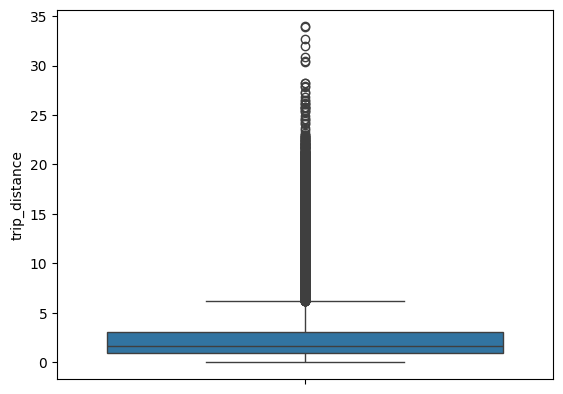

In [29]:
sns.boxplot(df1['trip_distance']);

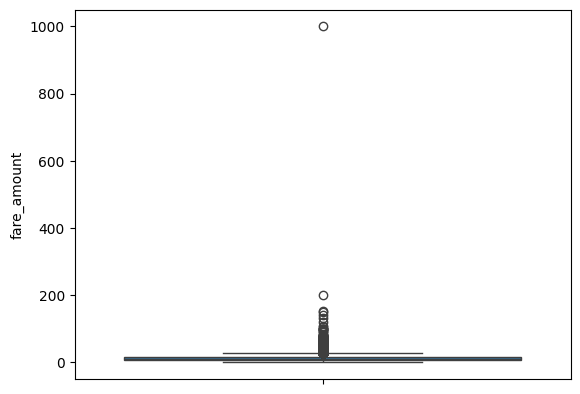

In [30]:
sns.boxplot(df1['fare_amount']);

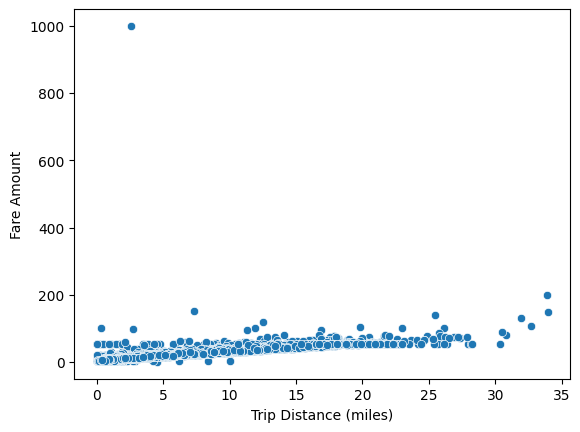

In [31]:
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=df1
)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.show()

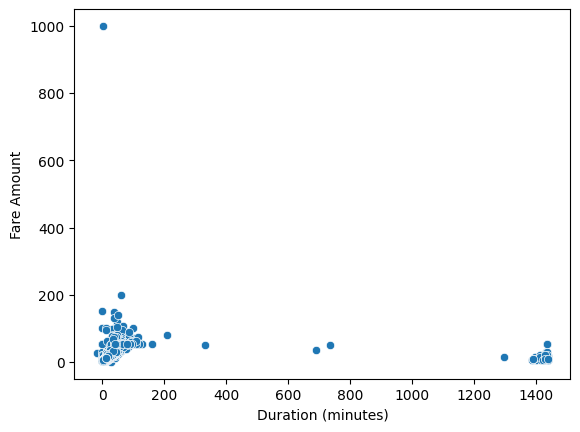

In [32]:
sns.scatterplot(
    x='duration_minutes',
    y='fare_amount',
    data=df1
)
plt.xlabel('Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()

In [33]:
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

In [34]:
df1[['trip_distance', 'fare_amount', 'fare_per_mile']].sort_values(
    by='fare_per_mile', ascending=False
).head(10)


,trip_distance,fare_amount,fare_per_mile
19827,0.01,52.00,5200.000000
3609,0.01,52.00,5200.000000
19644,0.01,52.00,5200.000000
8197,0.01,52.00,5200.000000
5429,0.02,52.00,2600.000000
21088,0.03,20.50,683.333333
4541,0.02,10.50,525.000000
3288,0.10,52.00,520.000000
5200,0.10,52.00,520.000000
8476,2.60,999.99,384.611538


In [35]:
df1[['trip_distance', 'fare_amount', 'fare_per_mile']].sort_values(
    by='fare_per_mile', ascending=True
).head(10)

,trip_distance,fare_amount,fare_per_mile
4061,4.5,0.01,0.002222
2223,10.0,2.50,0.250000
13306,8.4,2.50,0.297619
19028,6.2,2.50,0.403226
15499,4.2,2.50,0.595238
20816,2.7,2.50,0.925926
1075,2.3,2.50,1.086957
18059,2.9,3.50,1.206897
7332,2.0,2.50,1.250000
5678,1.5,2.50,1.666667


These extreme fare values do not align with trip distance or duration and result in unrealistically high fare-per-mile ratios. Therefore, they represent data anomalies rather than valid but rare taxi rides.

In [36]:
df2 = df1[
    (df1['fare_amount'] >= 2.50) &
    (df1['fare_per_mile'] <= 25)
]

In [37]:
df2.sort_values(by='fare_amount',ascending=False)

,passenger_count,trip_distance,fare_amount,tolls_amount,duration_minutes,pickup_weekday,pickup_month,fare_per_mile
13861,1,33.92,200.01,5.76,60.150000,4,5,5.896521
3582,1,7.30,152.00,0.00,0.683333,6,1,20.821918
9280,2,33.96,150.00,0.00,39.216667,6,6,4.416961
16379,1,25.50,140.00,16.26,50.566667,3,11,5.490196
10291,1,31.95,131.00,0.00,37.900000,0,9,4.100156
...,...,...,...,...,...,...,...,...
22102,1,1.10,2.50,0.00,0.033333,1,7,2.272727
16341,1,0.10,2.50,0.00,0.316667,6,8,25.000000
16467,1,0.11,2.50,0.00,0.416667,1,5,22.727273
21593,1,1.20,2.50,0.00,0.033333,4,4,2.083333


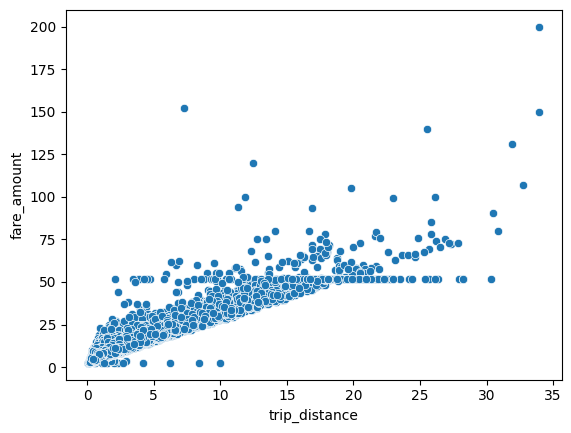

In [38]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df2)
plt.show()

Fare amount outliers were evaluated using distance–fare and duration–fare consistency checks, along with a fare-per-mile analysis.

Observations with unrealistically high fare-per-mile values were identified as data anomalies and removed to prevent distortion of the predictive model.

After removing fare anomalies that violated distance- and duration-based pricing logic, 

the fare–distance relationship became stable and interpretable, indicating that the remaining observations represent valid taxi trips.

## Stage 3 Model selection

In [39]:
df2

,passenger_count,trip_distance,fare_amount,tolls_amount,duration_minutes,pickup_weekday,pickup_month,fare_per_mile
0,6,3.34,13.0,0.00,14.066667,5,3,3.892216
1,1,1.80,16.0,0.00,26.500000,1,4,8.888889
2,1,1.00,6.5,0.00,7.200000,4,12,6.500000
3,1,3.70,20.5,0.00,30.250000,6,5,5.540541
4,1,4.37,16.5,0.00,16.716667,5,4,3.775744
...,...,...,...,...,...,...,...,...
22694,3,0.61,4.0,0.00,3.266667,4,2,6.557377
22695,1,16.71,52.0,5.76,40.800000,6,8,3.111909
22696,1,0.42,4.5,0.00,4.133333,0,9,10.714286
22697,1,2.36,10.5,0.00,11.933333,5,7,4.449153


In [40]:
import statsmodels.api as sm

features = ['trip_distance']
x = df2[features]
y = df2['fare_amount']

x = sm.add_constant(x)  # VERY IMPORTANT

ols_model = sm.OLS(y,x).fit() # fit the model

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 2.013e+05
Date:                Mon, 22 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:07:50   Log-Likelihood:                -59262.
No. Observations:               22429   AIC:                         1.185e+05
Df Residuals:                   22427   BIC:                         1.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7174      0.029    161.963      0.000       4.660       4.775
trip_distance     2.7814      0.006    448.633      0.000       2.769       2.794
==============================================================================
Omnibus:                    29850.361   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27993726.929
Skew:                           6.990   Prob(JB):                         0.00
Kurtosis:                     175.508   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

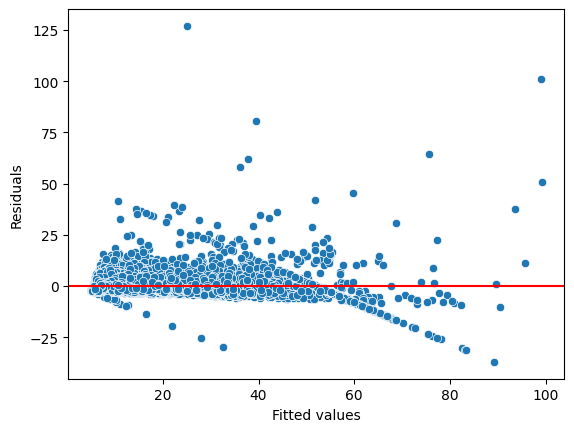

In [41]:
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

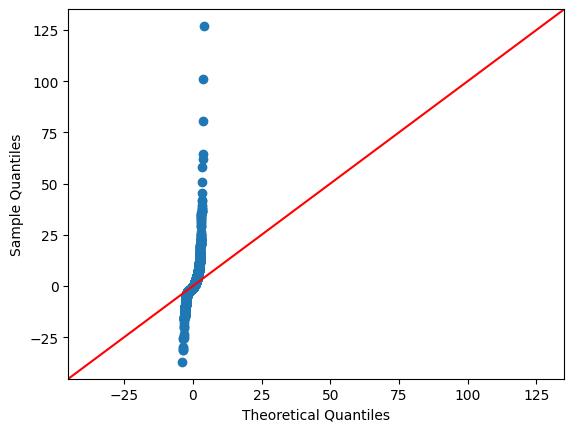

In [42]:
sm.qqplot(residuals, line='45')
plt.show()

In [43]:
features1=['trip_distance','duration_minutes']
x1=df2[features1]
y1=df2['fare_amount']
x1=sm.add_constant(x1)
ols_model1=sm.OLS(y1,x1).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.016e+05
Date:                Mon, 22 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:07:51   Log-Likelihood:                -59160.
No. Observations:               22429   AIC:                         1.183e+05
Df Residuals:                   22426   BIC:                         1.184e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6674      0.029    159.805      0.000       4.610       4.725
trip_distance        2.7676      0.006    443.051      0.000       2.755       2.780
duration_minutes     0.0053      0.000     14.278      0.000       0.005       0.006
==============================================================================
Omnibus:                    30013.725   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29227900.665
Skew:                           7.054   Prob(JB):                         0.00
Kurtosis:                     179.284   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

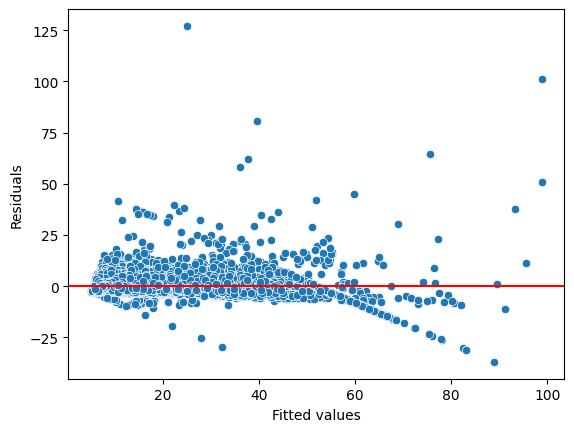

In [44]:
fitted_vals1 = ols_model1.fittedvalues
residuals1 = ols_model1.resid

sns.scatterplot(x=fitted_vals1, y=residuals1)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

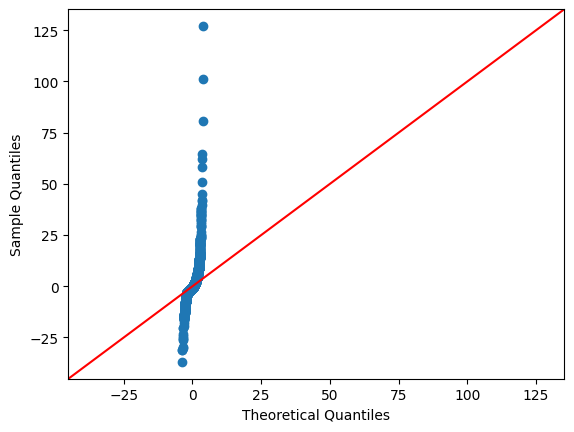

In [45]:
sm.qqplot(residuals1, line='45')
plt.show()

In [46]:
df2['log_fare'] = np.log(df2['fare_amount'])

C:\Users\AKASH RAJ\AppData\Local\Temp\ipykernel_19628\464449449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_fare'] = np.log(df2['fare_amount'])


In [47]:

features2 = ['trip_distance','duration_minutes']
X2 = df2[features2]
X2 = sm.add_constant(X2)

y_log = df2['log_fare']


ols_log = sm.OLS(y_log, X2).fit()
ols_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_fare   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 2.864e+04
Date:                Mon, 22 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:07:51   Log-Likelihood:                -6985.1
No. Observations:               22429   AIC:                         1.398e+04
Df Residuals:                   22426   BIC:                         1.400e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9061      0.003    668.229      0.000       1.900       1.912
trip_distance        0.1426      0.001    233.699      0.000       0.141       0.144
duration_minutes     0.0005   3.62e-05     14.994      0.000       0.000       0.001
==============================================================================
Omnibus:                     1198.444   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2072.109
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                       4.218   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

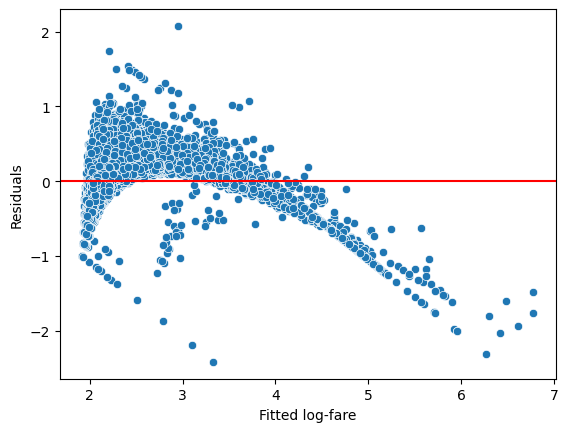

In [48]:
fitted_vals2 = ols_log.fittedvalues
residuals2 = ols_log.resid

sns.scatterplot(x=fitted_vals2, y=residuals2)
plt.axhline(0, color='red')
plt.xlabel("Fitted log-fare")
plt.ylabel("Residuals")
plt.show()

### Features selection

In [49]:
features3=['trip_distance','duration_minutes']
x3=df2[features3]
y3=df2['fare_amount']

### 🔹 Train–test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=42)

### 🔹 Train model

In [51]:
from sklearn.ensemble import RandomForestRegressor
model_rfr=RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42)
model_rfr.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔹 Predictions

In [52]:
y_pred=model_rfr.predict(x_test)

### 🔹 Model evaluation

In [53]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.45884250392542864, 1.9266687644664822, 0.9674656352525963)

### 🔹 Residual plot diagnostics

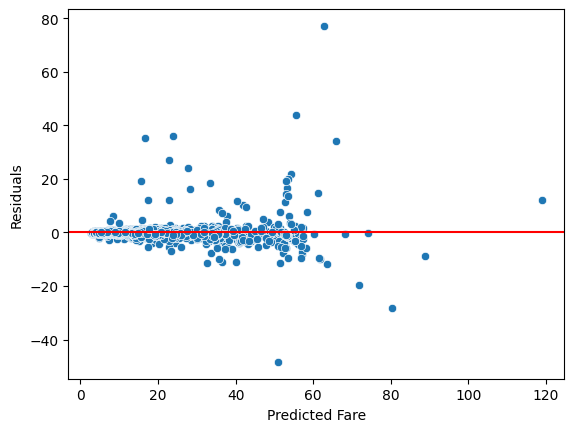

In [54]:
residuals3 = y_test - y_pred

sns.scatterplot(x=y_pred, y=residuals3)
plt.axhline(0, color='red')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.show()

### Next model 
### Feature Selection

In [55]:
features4=['trip_distance','duration_minutes','tolls_amount','passenger_count']
x4=df2[features4]
y4=df2['fare_amount']

### 🔹 Train–test split

In [56]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x4,y4,test_size=0.3,random_state=42)

### 🔹 Train model

In [57]:
from sklearn.ensemble import RandomForestRegressor
model_rfr1=RandomForestRegressor(n_estimators=154,max_depth=10,random_state=38)
model_rfr1.fit(x_train1,y_train1)


,n_estimators,154
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔹 Predictions

In [58]:
y_pred1=model_rfr1.predict(x_test1)

### 🔹 Model evaluation

In [59]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test1, y_pred1)
rmse = root_mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

mae, rmse, r2

(0.43034755501183697, 1.7197247362583616, 0.9740793376757775)

### 🔹 Residual plot diagnostics

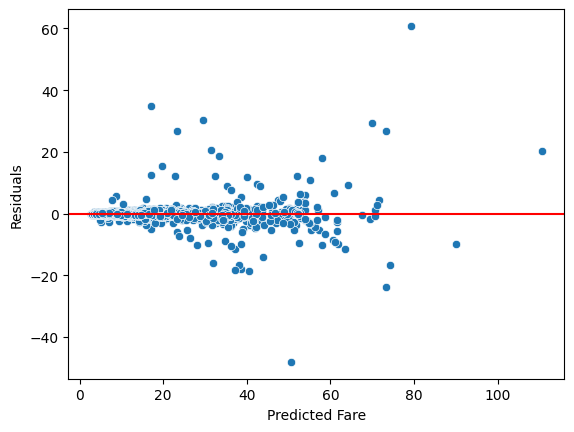

In [60]:
residuals4 = y_test1 - y_pred1

sns.scatterplot(x=y_pred1, y=residuals4)
plt.axhline(0, color='red')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.show()

## Stage 4 Final model selection

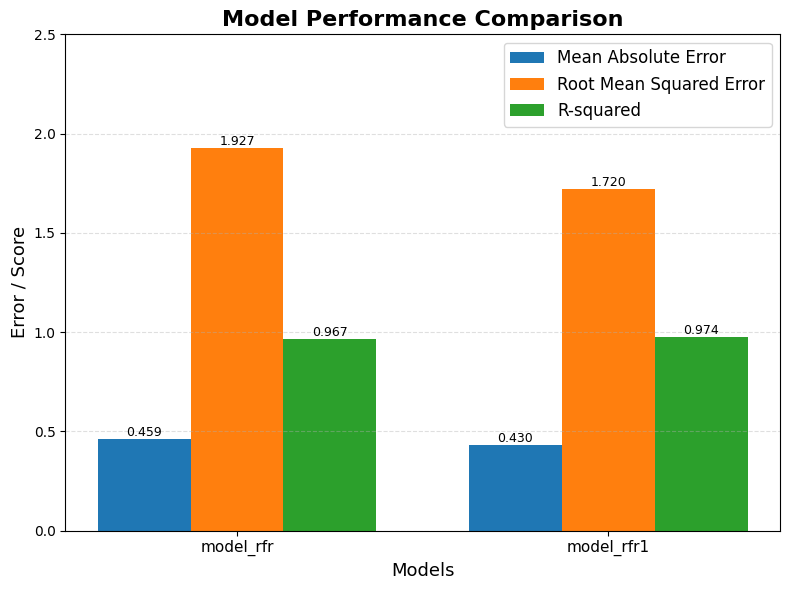

In [61]:
import numpy as np
import matplotlib.pyplot as plt

models = ['model_rfr', 'model_rfr1']

MAE = [0.45884250392542864, 0.43034755501183697]
RMSE = [1.9266687644664822, 1.7197247362583616]
R2 = [0.9674656352525963, 0.9740793376757775]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 6))

# Bars
bars_mae = plt.bar(x - width, MAE, width, label='Mean Absolute Error')
bars_rmse = plt.bar(x, RMSE, width, label='Root Mean Squared Error')
bars_r2 = plt.bar(x + width, R2, width, label='R-squared')

# 🔹 Add data labels
for bars in [bars_mae, bars_rmse, bars_r2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Labels & aesthetics
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Models", fontsize=13)
plt.ylabel("Error / Score", fontsize=13)
plt.ylim(0, 2.5)
plt.xticks(x, models, fontsize=11)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()

# Save image for PPT
plt.savefig("model_performance_comparison.png", dpi=300)
plt.show()


A Random Forest regressor was selected as the final model due to its ability to capture non-linear pricing patterns observed in the data.

 Compared to the linear baseline, the model achieved lower prediction error and demonstrated stable performance across multiple hyperparameter configurations.
 
  Diagnostic plots indicate minimal bias and improved residual behavior, making the model suitable for real-world fare estimation.

In [62]:
### Final Model
Final_features=['trip_distance','duration_minutes','tolls_amount','passenger_count']
Final_x=df2[Final_features]
Final_y=df2['fare_amount']

x_train_final,x_test_final,y_train_final,y_test_final=train_test_split(x4,y4,test_size=0.3,random_state=42)

Final_model=RandomForestRegressor(n_estimators=154,max_depth=10,random_state=38)
Final_model.fit(x_train_final,y_train_final)

,n_estimators,154
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
y_pred_final=model_rfr1.predict(x_test_final)

mae = mean_absolute_error(y_test_final, y_pred_final)
rmse = root_mean_squared_error(y_test_final, y_pred_final)
r2 = r2_score(y_test_final, y_pred_final)

mae, rmse, r2

(0.43034755501183697, 1.7197247362583616, 0.9740793376757775)

In [64]:
import joblib

joblib.dump(Final_model, "final_random_forest_model.pkl")

['final_random_forest_model.pkl']

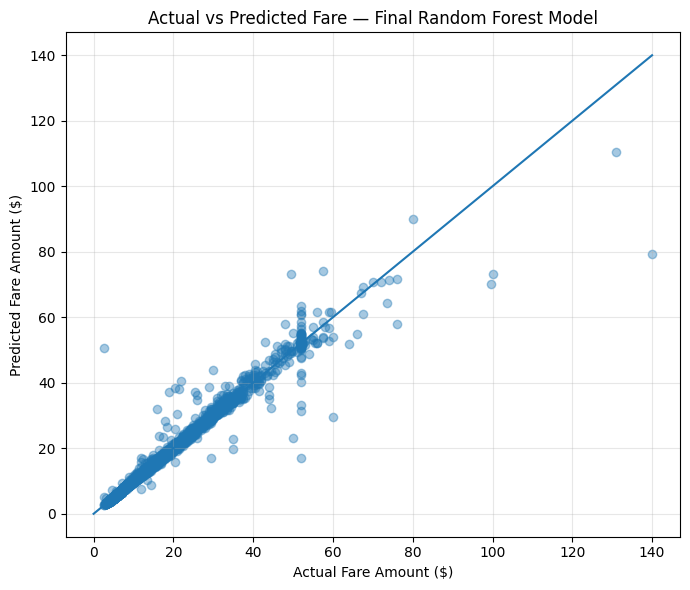

In [65]:

# Actual and predicted values from final model
y_true = y_test_final
y_pred = y_pred_final

plt.figure(figsize=(7, 6))

# Scatter plot
plt.scatter(y_true, y_pred, alpha=0.4)

# 45-degree reference line
max_val = max(y_true.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val])

# Labels & title
plt.xlabel("Actual Fare Amount ($)")
plt.ylabel("Predicted Fare Amount ($)")
plt.title("Actual vs Predicted Fare — Final Random Forest Model")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [66]:
# Create Power BI export dataframe
powerbi_df = x_test_final.copy()

powerbi_df['actual_fare'] = y_test_final.values
powerbi_df['predicted_fare'] = y_pred_final
powerbi_df['error'] = powerbi_df['actual_fare'] - powerbi_df['predicted_fare']
powerbi_df['absolute_error'] = abs(powerbi_df['error'])

In [67]:
powerbi_df['fare_band'] = pd.cut(
    powerbi_df['actual_fare'],
    bins=[0, 10, 20, 40, 60, 100, 500],
    labels=['0-10', '10-20', '20-40', '40-60', '60-100', '100+']
)

powerbi_df.to_csv("nyc_taxi_fare_powerbi.csv", index=False)


In [68]:
# Predict on full dataset
y_pred_all = Final_model.predict(Final_x)

powerbi_df_all = Final_x.copy()
powerbi_df_all['actual_fare'] = Final_y.values
powerbi_df_all['predicted_fare'] = y_pred_all
powerbi_df_all['error'] = powerbi_df_all['actual_fare'] - powerbi_df_all['predicted_fare']
powerbi_df_all['absolute_error'] = abs(powerbi_df_all['error'])

powerbi_df_all.to_csv("nyc_taxi_fare_powerbi_full.csv", index=False)
